## Proble definition:  
Sudden and heavy rains cause damage to the agricultural industry.So a rainfall prediction model will make the systems alert.

## Data description:


*   This dataset is weatherAUS.It contains various climate and weather parameters.  
*  Target variable has two types of categories whether it will rain or not the next daya i.e. yes or no  
*  If the target column is yes the rainfall is more than 1mm
*  Dataset size is 14MB

**Attributes:**


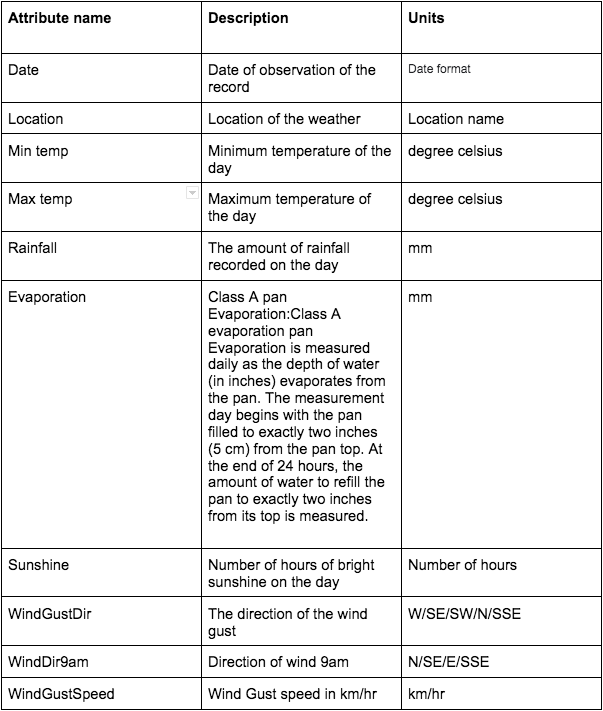






## Importing dependencies

In [6]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
#basic python libraries
import pandas as pd 
import numpy as np
import missingno as msno

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

#scikit-learn modules for models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans

## Loading data

In [8]:
# reading the data
rain_data = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# displaying sample data
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
rain_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [11]:
# data overview
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null




*   There are 145460 instances in the data
*   There are 7 object columns
*   Remaining 15 columns are numerical columns
*   There are missing values in the data






In [13]:
#number of locations
len(rain_data['Location'].unique())

49

## Visualizing missing values





----This heatmap displays the correlation of columns with eachother when there are missing values. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

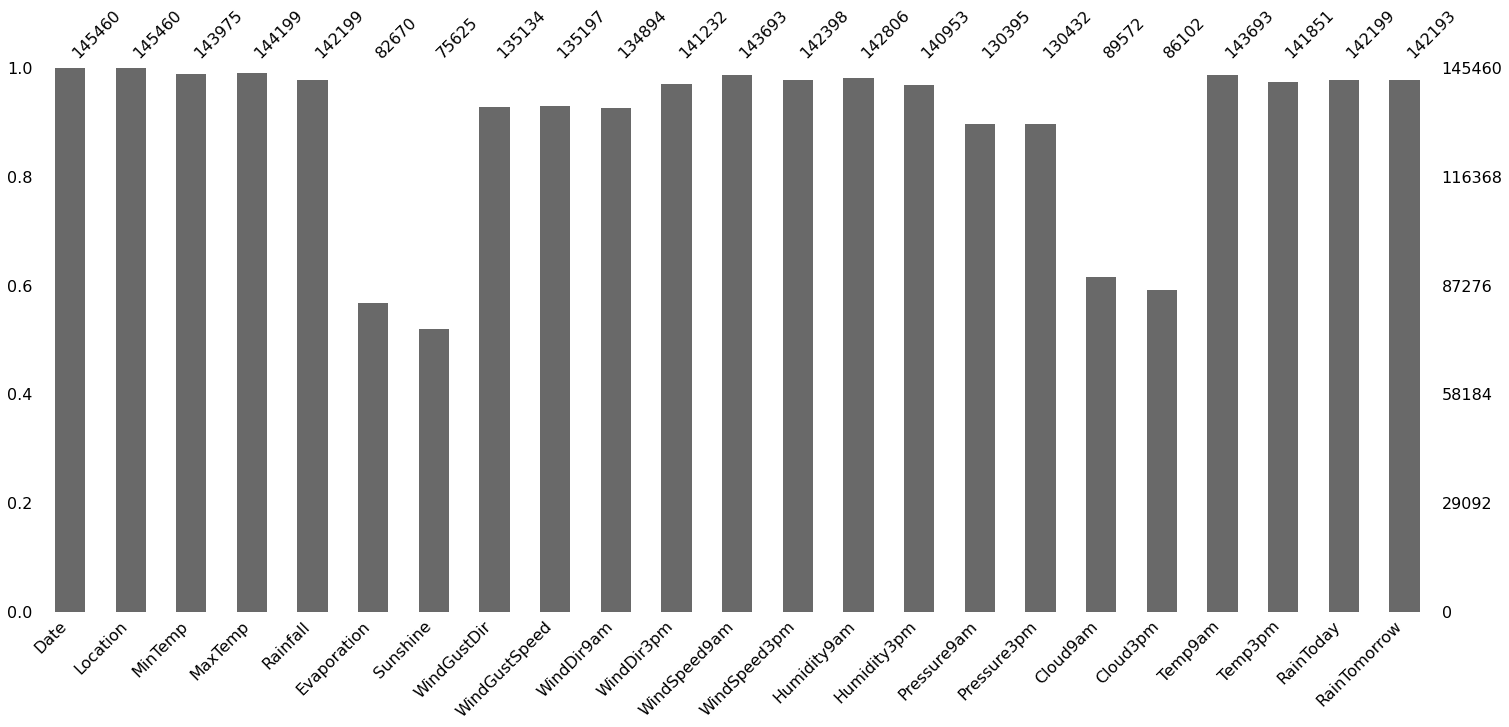

In [14]:
#bar chart of missing values
msno.bar(rain_data)
plt.show()

In [15]:
percent_missing = rain_data.isnull().sum() * 100 / len(rain_data)
missing_value = pd.DataFrame({'column_name': rain_data.columns,
                                 'percent_missing': percent_missing})

In [16]:
missing_value.sort_values('percent_missing', inplace=True,ascending=False)
missing_value

,column_name,percent_missing
Sunshine,Sunshine,48.009762
Evaporation,Evaporation,43.166506
Cloud3pm,Cloud3pm,40.807095
Cloud9am,Cloud9am,38.421559
Pressure9am,Pressure9am,10.356799
Pressure3pm,Pressure3pm,10.331363
WindDir9am,WindDir9am,7.263853
WindGustDir,WindGustDir,7.098859
WindGustSpeed,WindGustSpeed,7.055548
Humidity3pm,Humidity3pm,3.098446




*   Evoparation,sunshine,cloud9am and cloud3pm have the highest missing values



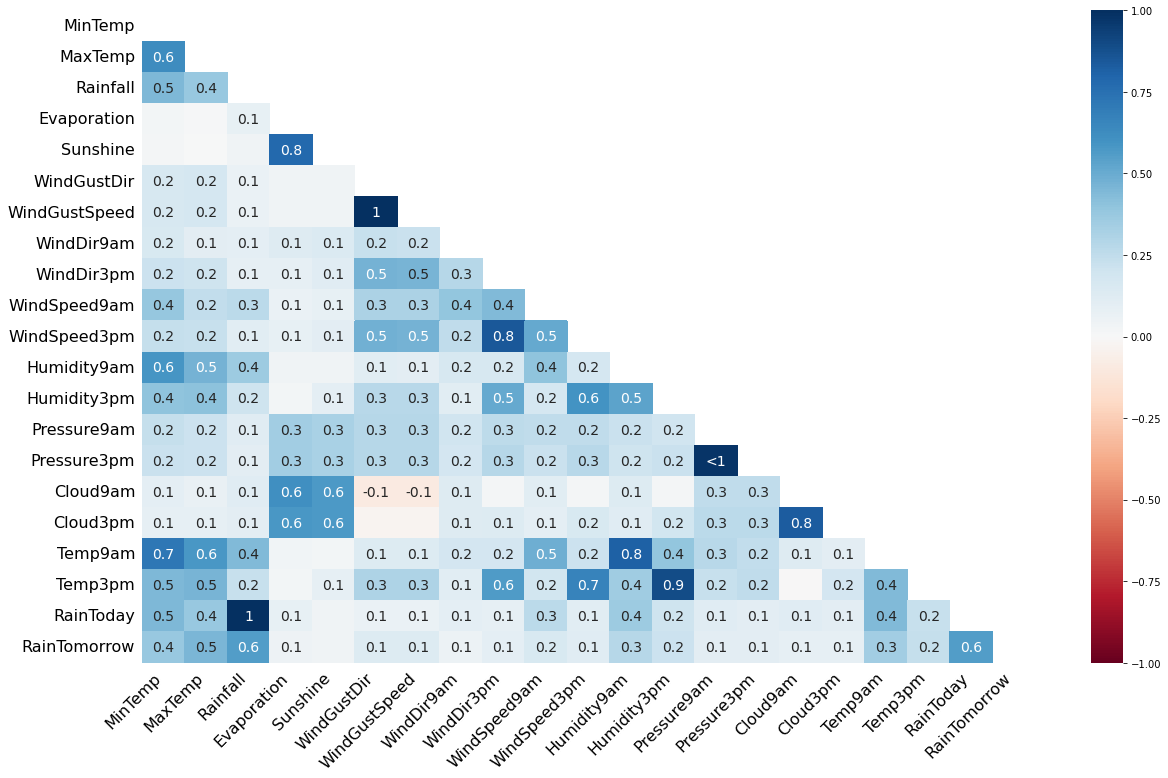

In [17]:
#displaying missing values correlation
msno.heatmap(rain_data)
plt.show()



*   cloud 9 am is negatively correlated with windgust dir and windgust speed
*   Rainfall is strongly correlated with RainTomorrow.Windgust spped is strongly correlated with windgust direction



Dealing with missing data

In [18]:
#dropping null values
rain_data = rain_data.dropna()


### Exploratory data analysis


Distribution of targets

In [19]:
import plotly.graph_objects as go

labels = ['No','Yes']
values = list(rain_data['RainTomorrow'].value_counts())


In [20]:

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(width=500, height=500)
fig.show()

RainTomorrow --- No ---is the dominant class

In [21]:
import plotly.express as px
df = rain_data
fig = px.scatter(df, x="Rainfall", y="Evaporation", animation_frame="Location",color="RainToday", range_x=[0,120], range_y=[0,30])
fig.show()

In [22]:
import plotly.express as px
df = rain_data
fig = px.histogram(df, x="WindGustDir", y="WindGustSpeed",
             color='RainToday', barmode='group',
             height=400,title="WindGust speed and direction")

fig.show()



*   WindGust speed is very low when Raintoday is No




In [23]:
import plotly.express as px
df = rain_data
fig = px.histogram(df, x="Pressure9am", y="Pressure3pm",
             color='RainToday', barmode='group',
             height=400,title="Pressure vs RainToday")

fig.show()


*  Pressure is low for RainToday yes catrgory




In [24]:
import plotly.express as px
fig = px.scatter_matrix(rain_data, dimensions=['MinTemp', 'MaxTemp', 'Humidity9am', "Humidity3pm"], color="RainToday")
fig.show()


*  There is no clear seperability for humidity and temperature







## SMOTE analysis
Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [25]:
#dropping data and location columns
rain_data.drop(['Date','Location'],axis=1,inplace=True)
objList = rain_data.select_dtypes(include = "object").columns
print (objList)

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')


In [26]:
# label encoding the data

le = LabelEncoder()

for feat in objList:
    rain_data[feat] = le.fit_transform(rain_data[feat].astype(str))

print (rain_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  int64  
 6   WindGustSpeed  56420 non-null  float64
 7   WindDir9am     56420 non-null  int64  
 8   WindDir3pm     56420 non-null  int64  
 9   WindSpeed9am   56420 non-null  float64
 10  WindSpeed3pm   56420 non-null  float64
 11  Humidity9am    56420 non-null  float64
 12  Humidity3pm    56420 non-null  float64
 13  Pressure9am    56420 non-null  float64
 14  Pressure3pm    56420 non-null  float64
 15  Cloud9am       56420 non-null  float64
 16  Cloud3pm       56420 non-null  float64
 17  Temp9am        56420 non-null  float64
 18  Te

In [27]:
#seperating labels and trgets
X = rain_data.drop('RainTomorrow',axis=1).to_numpy()
y = rain_data['RainTomorrow'].to_numpy()

In [28]:
from imblearn.over_sampling import RandomOverSampler
Rand_over_sample = RandomOverSampler(random_state=0)


In [29]:

X_resampled, y_resampled = Rand_over_sample.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 43993), (1, 43993)]


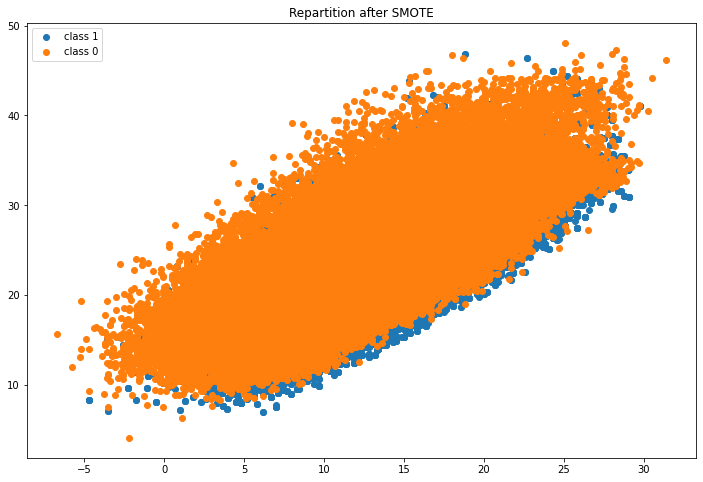

In [30]:
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')
plt.scatter(X_resampled[y_resampled==1][:, 0], X_resampled[y_resampled==1][:, 1], label='class 1')
plt.scatter(X_resampled[y_resampled==0][:, 0], X_resampled[y_resampled==0][:, 1], label='class 0')
plt.legend()
plt.grid(False)
plt.show()

## Splitting the data into train and test

In [31]:

x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [32]:
x_train.shape,x_test.shape

((70388, 20), (17598, 20))

# ANOVA feature selection





In [33]:

fs = SelectKBest(score_func=f_classif)
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

In [34]:
fs.get_support(indices=True)

array([ 2,  4,  6, 11, 12, 13, 14, 15, 16, 19])

In [35]:
new_features = rain_data[rain_data.columns[fs.get_support(indices=True)]].columns
new_features

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')

In [36]:
rain_data[rain_data.columns[fs.get_support(indices=True)]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
Sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
Humidity9am,56420.0,65.874123,18.513289,0.0,55.0,67.0,79.0,100.0
Humidity3pm,56420.0,49.601985,20.197040,0.0,35.0,50.0,63.0,100.0
Pressure9am,56420.0,1017.239505,6.909357,980.5,1012.7,1017.2,1021.8,1040.4
Pressure3pm,56420.0,1014.795580,6.870892,977.1,1010.1,1014.7,1019.4,1038.9
Cloud9am,56420.0,4.241705,2.797162,0.0,1.0,5.0,7.0,8.0
Cloud3pm,56420.0,4.326515,2.647251,0.0,2.0,5.0,7.0,9.0
RainToday,56420.0,0.220879,0.414843,0.0,0.0,0.0,0.0,1.0


Feature 0: 728.046589
Feature 1: 2379.309805
Feature 2: 4256.365791
Feature 3: 1934.662153
Feature 4: 26660.166108
Feature 5: 419.371066
Feature 6: 5268.232909
Feature 7: 136.903423
Feature 8: 96.100256
Feature 9: 713.164714
Feature 10: 805.064772
Feature 11: 8762.198003
Feature 12: 26193.511075
Feature 13: 6791.908134
Feature 14: 5428.442909
Feature 15: 13877.853011
Feature 16: 21773.130591
Feature 17: 48.334717
Feature 18: 3697.332110
Feature 19: 8961.007740


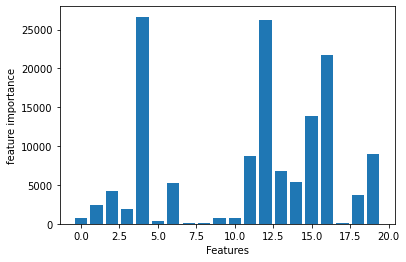

In [37]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Features')
plt.ylabel('feature importance')
plt.show()

## Machine learning models implementation

1.Decision tree classifier

In [38]:
#creating decision tree object
dt = DecisionTreeClassifier(random_state=0)
#training the model
dt.fit(X_train_fs,y_train)

DecisionTreeClassifier(random_state=0)

In [39]:
#decision tree test score
dt_score = round(dt.score(X_test_fs,y_test),2)

In [40]:
#decision tree predictions
dt_pred = dt.predict(X_test_fs)

In [41]:
# classification report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8754
           1       0.87      0.97      0.92      8844

    accuracy                           0.91     17598
   macro avg       0.92      0.91      0.91     17598
weighted avg       0.92      0.91      0.91     17598



In [42]:
import pickle
with open('d_tree.pickle','wb') as f:
  pickle.dump(dt,f)

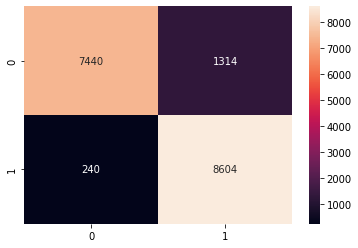

In [43]:
cm = confusion_matrix(y_test,dt_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

There is a high misclassification rate for 'Yes' as 'No'

2.Gradientboost

In [44]:
#creating gradientboost object
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
 max_depth=1, random_state=0).fit(X_train_fs,y_train)

In [45]:
#gradientboost test score
gb.score(X_test_fs,y_test)

0.7984998295260826

In [46]:
#gradientboost predictions
gb_pred = gb.predict(X_test_fs)

In [47]:
#gradientboost classification report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8754
           1       0.80      0.80      0.80      8844

    accuracy                           0.80     17598
   macro avg       0.80      0.80      0.80     17598
weighted avg       0.80      0.80      0.80     17598



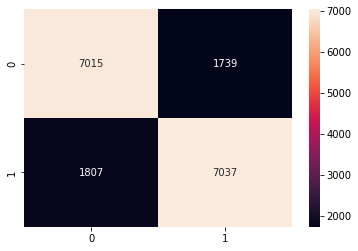

In [48]:
cm = confusion_matrix(y_test,gb_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

There is a high misclassification rate of 'No' as 'Yes'

Adaboost classifier

In [49]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train_fs,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [50]:
# predictions
ada_pred = ada.predict(X_test_fs)

In [51]:
#adaboost test score
ada.score(X_test_fs,y_test)

0.8016820093192408

In [52]:
#classification report
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8754
           1       0.80      0.80      0.80      8844

    accuracy                           0.80     17598
   macro avg       0.80      0.80      0.80     17598
weighted avg       0.80      0.80      0.80     17598



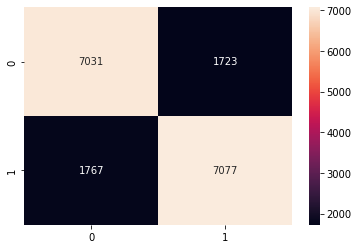

In [53]:
cm = confusion_matrix(y_test,ada_pred)
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

There is a high misclassification rate of 'yes' as 'no'

K-Means clustering

In [54]:

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X_train_fs)

KMeans(n_clusters=2, random_state=0)

In [55]:
kmeans.cluster_centers_

array([[5.28265831e+00, 4.73371047e+00, 4.25784058e+01, 7.98289239e+01,
        6.95630197e+01, 1.01560763e+03, 1.01371320e+03, 5.95681646e+00,
        6.01572749e+00, 4.64070615e-01],
       [5.92347755e-01, 9.19164312e+00, 4.37187255e+01, 5.43738639e+01,
        3.64205671e+01, 1.01666883e+03, 1.01377873e+03, 3.30700888e+00,
        3.62787214e+00, 9.16703544e-02]])

In [56]:
kmeans.inertia_

53762791.53343457

In [57]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_train == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 20512 out of 56420 samples were correctly labeled.


In [58]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.36


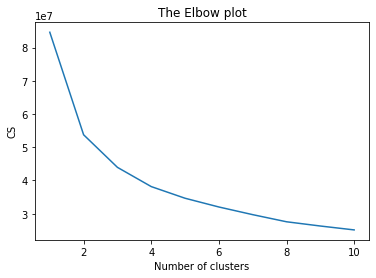

In [59]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_fs)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [60]:
X_test_fs[:,3]

array([ 71., 100.,  31., ...,  53.,  73.,  59.])

From the above graph we can see that the optimal number of clusters is 2